# Introduction to control and scipy signal processing module

Adam Peichl (adam.peichl@fs.cvut.cz), Mechanical Engineering - Department of Instrumentation and Control, Czech Technical University

What are goals of this tutorial:
1. intuitive notion what is *control* and why is it usefull
1. introduction to `scipy.signal` module
1. use `scipy.signal` module to model dynamics and to design controller


What are definitely not goals:
1. Go deep into control theory
1. Go deep into mathematics of differential equations etc.

## Schedule of tis lecture
1. introduction (What is control)
1. intuitive notion of used mathematics (differential equations, Laplace and Fourier transfrom)
1. introduction of `scipy.signal` module
1. model dynamics of simple spring-mass-damper system
1. design very simple `P` and `PI` controller for water turbine

## Dependencies
1. I will use `python 3.10`
1. packages `matplotlib`, `numpy`, `scipy` (+ maybe standard libraries)
1. assume basic knowledge of `numpy` and `matplotlib`

## Introduction

Control is

> Field that combines engineering and applied mathematics to control dynamical systems.

### Dynamics

Adding time behaviour, consider some realworld process

![dynamics](./data/dynamics.svg)



### Feedforward control

![feedforward](./data/feedforward_control.svg)

### Feedback control

![feedback](./data/feedback_control.svg)

## Used mathematics

### Linear time-invariant (LTI) systems

![lti system](./data/lti_system.svg)

For us LTI system will take this form (no derivatives of input):
$$
\begin{equation}
\frac{d^{n}}{dt^n} y(t) + \dots + a_2 \frac{d^{2}}{dt^2} y(t) + a_1 \frac{d}{dt} y(t) + a_0 y(t) = b_0 u(t),
\end{equation}
$$
where $u(t)$ is *input* and *y(t)* is output.

Example of very simple (first order) LTI system with different notation:
$$
\begin{equation}
T \dot{y}(t) + y(t) = K u(t),
\end{equation}
$$
where dot means first derivative (two dots would be second) and $K$ is called *gain* (zesílení), $T$ is called *time constant* (časová konstanta).

### Ordinary differential equations

nth-order linear differential equation can be transformed to system of *Ordinary differential equations* (obyčejná differenciální rovnice) ODEs. In control we use *state space form* (stavová formulace systému):

$$
\begin{align}
    \dot{x}(t) = Ax(t) + Bu(t) \\
    y(t) = Cx(t) + Du(t),
\end{align}
$$
where $x(t)$ is a vector of *state-space variables* (vektor stavových proměnných). And $A,B,C,D$ are matrices defining the system.

### Laplace transform

Sometimes it is very usefull to transform problems. With LTI, it is much easier to transform our problem from time-domain to complex-domain (frequency domain), solve our problem there and then use inverse transform to get back. Transform is defined as:

$$
\begin{equation}
    X(s) = \mathcal{L}\{x(t)\}(s) = \int_{-\infty}^{\infty} x(t) e^{-st} dt,
\end{equation}
$$

luckily for us, we will mainly need this:

$$
\begin{equation}
    \mathcal{L}\{\dot{x}(t)\}(s) = sX(s) - f(0),
\end{equation}
$$
and linearity
$$
\begin{equation}
    \mathcal{L}\{a x(t)\}(s) = aX(s).
\end{equation}
$$

![lti system](./data/laplace_systems.svg)

Example, obtain $G(s)$ from our previous example (assume zero conditions of course):
$$
\begin{equation}
T \dot{y}(t) + y(t) = K u(t),
\end{equation}
$$
apply Laplace operator on both sides:
$$
\begin{equation}
Y(s)(sT + 1) = K U(s),
\end{equation}
$$
and express $G(s)$
$$
\begin{equation}
G(s)=\frac{Y(s)}{U(s)} = \frac{K}{(sT + 1)},
\end{equation}
$$
we call $G(s)$ *transfer function* (přenos).




### Fourier transform

We will use fourier transform to examine how are system behaves when exposed to inputs of various frequencies. For our purposes it is sufficent to just use the following today:
$$
\begin{equation}
    \mathcal{L}\{x(t)\} = X(s) \rightarrow X(s)|_{s=j\omega} = \mathcal{F}\{x(t)\}
\end{equation}
$$








## Introduction to (some functionality of) `scipy.signal` module

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [9]:
K = 1.5
T = 5
numerator = K
denumenator = [T, 1]
G = scipy.signal.lti(numerator, denumenator)
G

TransferFunctionContinuous(
array([0.3]),
array([1. , 0.2]),
dt: None
)

# Step, impulse and frequency response

In [18]:
t = np.linspace(0,20,1000) # time

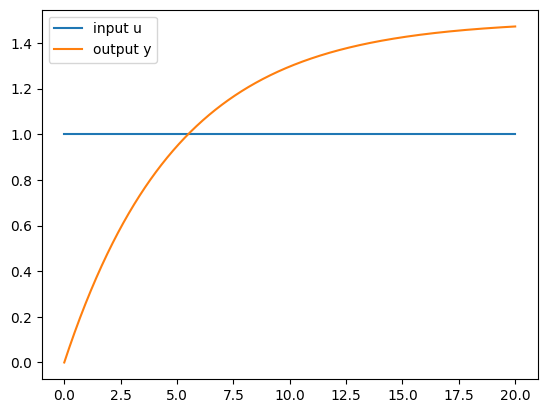

In [27]:
_, y_step = G.step(T=t)
plt.plot(t, t * 0 + 1, label="input u")
plt.plot(t, y_step, label="output y")
plt.legend()

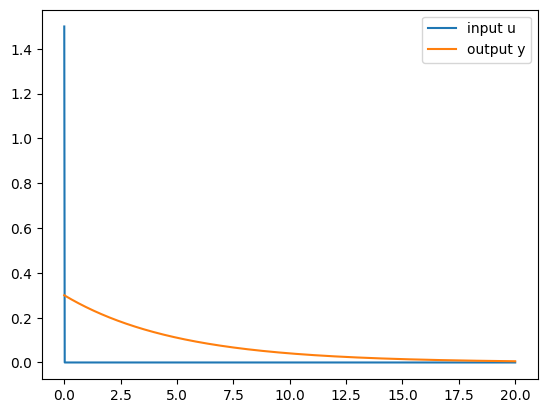

In [28]:
_, y_impulse = G.impulse(T=t)
u_impulse = t * 0
u_impulse[0] = 1.5 # dirac impulse, this is just for plot
plt.plot(t, u_impulse, label="input u")
plt.plot(t, y_impulse, label="output y")
plt.legend()

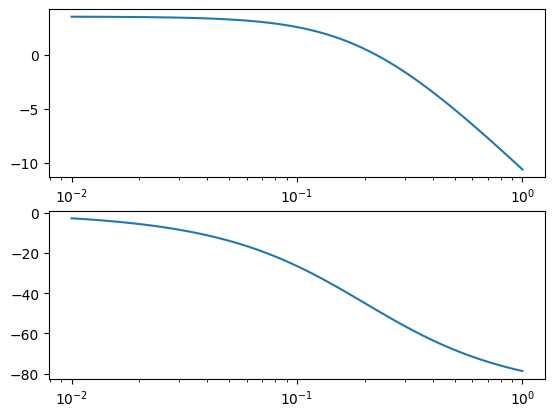

In [38]:
w, mag, phase = G.bode()
plt.figure()
plt.subplot(211)
plt.semilogx(w, mag)
plt.subplot(212)
plt.semilogx(w, phase)

Just a note, ratio of amplitudes in decibels is defined as:
$$
\begin{equation}
R_{db} = 20 \log_{10} \frac{A_y}{A_u}.
\end{equation}
$$



### Response to arbitrary input

In [59]:
A = 1.0
omega = 2.0 # rad/s
phase = 1.0
u = np.cos(omega*t)
_, y_lsim, xs = scipy.signal.lsim(G, U=u, T=t)

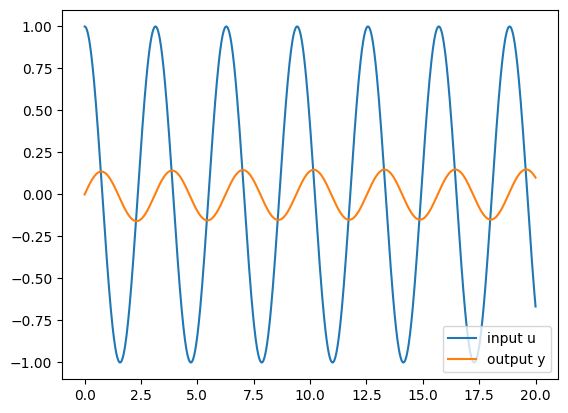

In [64]:
plt.plot(t, u, label="input u")
plt.plot(t, y_lsim, label="output y")
plt.legend()

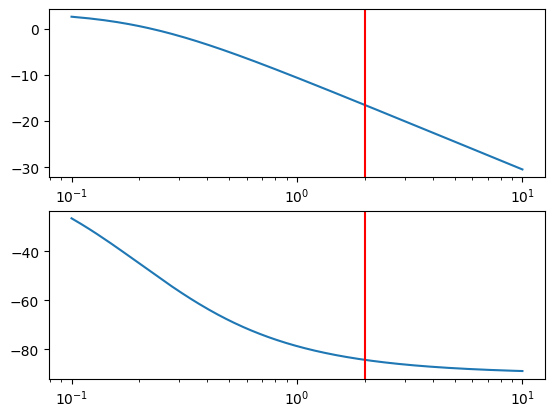

In [65]:

w, mag, phase = G.bode(w=np.linspace(0.1, 10, 1000))
plt.figure()
plt.subplot(211)
plt.semilogx(w, mag) # in db
plt.axvline(omega, color="r")
plt.subplot(212)
plt.semilogx(w, phase) # in deg
plt.axvline(omega, color="r")

### Converting to state space representation and examining (exponential) stability

In [75]:
numerator = [1]
denumenator = [1, 2, -5, 4, 3]
G = scipy.signal.lti(numerator, denumenator)

In [76]:
state_space = G.to_ss()
state_space

StateSpaceContinuous(
array([[-2.,  5., -4., -3.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.]]),
array([[1.],
       [0.],
       [0.],
       [0.]]),
array([[0., 0., 0., 1.]]),
array([[0.]]),
dt: None
)

In [79]:
r = np.linalg.eig(state_space.A)

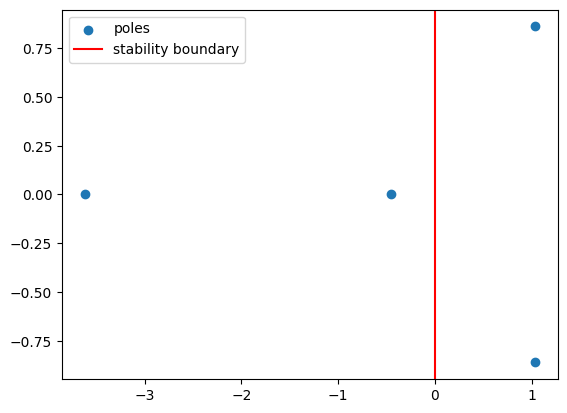

In [86]:
plt.scatter(r.eigenvalues.real, r.eigenvalues.imag, label="poles")
plt.axvline(0, label="stability boundary", color="red")
plt.legend()

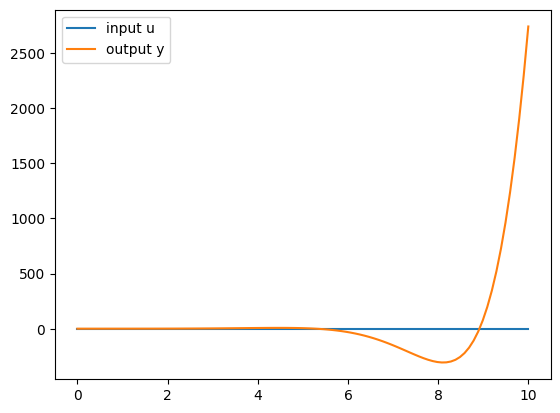

In [90]:
t = np.linspace(0, 10, 100)
_, y_step = state_space.step(T=t)
plt.plot(t, t * 0 + 1, label="input u")
plt.plot(t, y_step, label="output y")
plt.legend()